<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW3_Problem2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fine-Tuning

**Layers of  VGG19 **  
![alt text](https://cdn-images-1.medium.com/max/1600/1*cufAO77aeSWdShs3ba5ndg.jpeg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
import os
import zipfile

from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models,optimizers,layers
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.layers import Flatten
#Make sure to use tensorflow for better this code
from tensorflow.keras.applications import VGG19
conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

Instructions for updating:
Colocations handled automatically by placer.


##Preprocessing

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames.sort()
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
#Conv Base VGG19
conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

--2019-04-19 03:40:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   118MB/s    in 0.6s    

2019-04-19 03:40:14 (118 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



##Freezing the pretrained VGG19

Since VGG19 is a pretrained model. First we freeze all the layers so that we get the accuracy of the model

In [6]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)
validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model needs to be in Functional format, If not (Sequential) the whole layers cannot be shown in summary and there is trouble freezing them

In [0]:
for layer in conv_base.layers:
  set_trainable = False
  layer.trainable = False
arg1 = conv_base.output
arg1 = layers.Flatten(name='flatten')(arg1)
arg1 = layers.Dense(256,activation='relu')(arg1)
arg1 = layers.Dense(1,activation ='sigmoid')(arg1)
model = models.Model(inputs=[conv_base.input],outputs=[arg1])
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

In [13]:
for i,layer in enumerate(model.layers):
  print(i,' ',layer.name,' ',layer.trainable)

0   input_2   False
1   block1_conv1   False
2   block1_conv2   False
3   block1_pool   False
4   block2_conv1   False
5   block2_conv2   False
6   block2_pool   False
7   block3_conv1   False
8   block3_conv2   False
9   block3_conv3   False
10   block3_conv4   False
11   block3_pool   False
12   block4_conv1   False
13   block4_conv2   False
14   block4_conv3   False
15   block4_conv4   False
16   block4_pool   False
17   block5_conv1   False
18   block5_conv2   False
19   block5_conv3   False
20   block5_conv4   False
21   block5_pool   False
22   flatten   True
23   dense_8   True
24   dense_9   True


In [14]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,
                                validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
100/100 [==============================] - 28s 278ms/step - loss: 0.6169 - acc: 0.6690 - val_loss: 0.5542 - val_acc: 0.7470
Epoch 2/20
100/100 [==============================] - 24s 241ms/step - loss: 0.5173 - acc: 0.7575 - val_loss: 0.5031 - val_acc: 0.7600
Epoch 3/20
100/100 [==============================] - 23s 229ms/step - loss: 0.4799 - acc: 0.7765 - val_loss: 0.4709 - val_acc: 0.7810
Epoch 4/20
100/100 [==============================] - 23s 227ms/step - loss: 0.4460 - acc: 0.8100 - val_loss: 0.4621 - val_acc: 0.7850
Epoch 5/20
100/100 [==============================] - 24s 242ms/step - loss: 0.4318 - acc: 0.7995 - val_loss: 0.4235 - val_acc: 0.8200
Epoch 6/20
100/100 [==============================] - 23s 229ms/step - loss: 0.4049 - acc: 0.8225 - val_loss: 0.4424 - val_acc: 0.7880
Epoch 7/20
100/100 [==============================] - 23s 227ms/step - loss: 0.3986 - acc: 0.8330 - val_loss: 0.4219 - val_acc: 0.8110
Epoch 8

In [15]:
score= model.evaluate_generator(validation_generator,steps = 50)
print("Loss :",score[0])
print("Accuracy: %",score[1]*100)

Loss : 0.3677135810256004
Accuracy: % 83.79999995231628


Freezing the whole Conv Layers concluded to: ** 83 %**

##Unfreezing



Lets fine tune the last **Four CNN** layers = all layers above needs to be frozen.   

In [19]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [21]:
for i,layer in enumerate(model.layers):
  print(i,' ',layer.name,' ',layer.trainable)

0   input_2   False
1   block1_conv1   False
2   block1_conv2   False
3   block1_pool   False
4   block2_conv1   False
5   block2_conv2   False
6   block2_pool   False
7   block3_conv1   False
8   block3_conv2   False
9   block3_conv3   False
10   block3_conv4   False
11   block3_pool   False
12   block4_conv1   False
13   block4_conv2   False
14   block4_conv3   False
15   block4_conv4   False
16   block4_pool   False
17   block5_conv1   True
18   block5_conv2   True
19   block5_conv3   True
20   block5_conv4   True
21   block5_pool   True
22   flatten   True
23   dense_8   True
24   dense_9   True


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.



In [0]:
bestWeight="./optimal_weight.h5"
saveWeight = ModelCheckpoint(bestWeight, monitor='val_acc', verbose=1, save_best_only=True, mode='max', save_weights_only=False)
callbacks = [saveWeight]

In [31]:
verbose = 2
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,verbose = verbose,validation_data=validation_generator,validation_steps = 50,callbacks=callbacks)

Epoch 1/30
50/50 [==============================] - 9s 171ms/step - loss: 0.3018 - acc: 0.8800

Epoch 00001: val_acc improved from 0.84200 to 0.88000, saving model to ./optimal_weight.h5
 - 26s - loss: 0.2681 - acc: 0.8860 - val_loss: 0.3018 - val_acc: 0.8800
Epoch 2/30
50/50 [==============================] - 9s 171ms/step - loss: 0.3149 - acc: 0.8780

Epoch 00002: val_acc did not improve from 0.88000
 - 23s - loss: 0.2452 - acc: 0.9000 - val_loss: 0.3149 - val_acc: 0.8780
Epoch 3/30
50/50 [==============================] - 8s 168ms/step - loss: 0.3576 - acc: 0.8570

Epoch 00003: val_acc did not improve from 0.88000
 - 23s - loss: 0.2367 - acc: 0.9040 - val_loss: 0.3576 - val_acc: 0.8570
Epoch 4/30
50/50 [==============================] - 9s 182ms/step - loss: 0.2498 - acc: 0.8960

Epoch 00004: val_acc improved from 0.88000 to 0.89600, saving model to ./optimal_weight.h5
 - 25s - loss: 0.2011 - acc: 0.9110 - val_loss: 0.2498 - val_acc: 0.8960
Epoch 5/30
50/50 [========================

In [36]:
model.load_weights("optimal_weight.h5")
score= model.evaluate_generator(validation_generator,steps = 50)
print("Loss :",score[0])
print("Accuracy: ",score[1])

Loss : 0.26494279231876133
Accuracy:  0.923


Accuracy of ** 92 %** Increase of: 9%

In [0]:
model.save('optimal_model.h5')

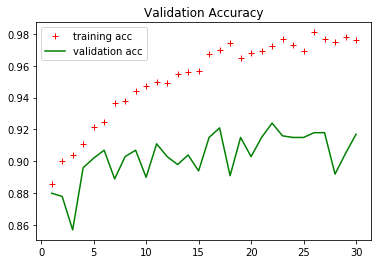

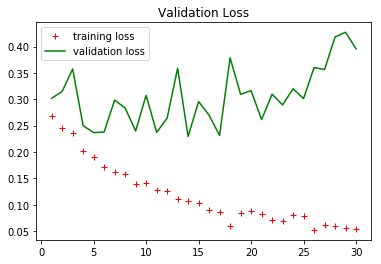

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# training and validation accuracy
plt.plot(epochs, acc, 'r+', label='training acc')
plt.plot(epochs, val_acc, 'g-', label='validation acc')
plt.title('Validation Accuracy')
plt.legend()
plt.figure()
# training and validation loss
plt.plot(epochs, loss, 'r+', label='training loss')
plt.plot(epochs, val_loss, 'g-', label='validation loss')
plt.title('Validation Loss')
plt.legend()

plt.show()
